In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Transaction_fact.csv')
data.head(5)

,tran_id,product_id,product_name,quantity,tran_date,unit_price,customer_id
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583


In [3]:
data.describe(include='all')

,tran_id,product_id,product_name,quantity,tran_date,unit_price,customer_id
count,27339,27339,27339,27339.000000,27339,27339.000000,27339.000000
unique,1518,2319,2383,NaN,1505,NaN,NaN
top,570672,POST,POSTAGE,NaN,10/11/2011 14:52,NaN,NaN
freq,259,918,918,NaN,259,NaN,NaN
mean,NaN,NaN,NaN,18.888877,NaN,5.323242,12828.362449
std,NaN,NaN,NaN,42.562203,NaN,68.605390,691.016101
min,NaN,NaN,NaN,-480.000000,NaN,0.000000,12349.000000
25%,NaN,NaN,NaN,5.000000,NaN,1.250000,12491.000000
50%,NaN,NaN,NaN,10.000000,NaN,1.850000,12627.000000
75%,NaN,NaN,NaN,16.000000,NaN,3.750000,12720.000000


In [4]:
data.customer_id.nunique()

283

In [5]:
data.isnull().sum()

tran_id         0
product_id      0
product_name    0
quantity        0
tran_date       0
unit_price      0
customer_id     0
dtype: int64

In [6]:
data_no_neg=data[data['quantity']>0]

In [7]:
data_no_neg.describe(include='all')

,tran_id,product_id,product_name,quantity,tran_date,unit_price,customer_id
count,26575,26575,26575,26575.000000,26575,26575.000000,26575.000000
unique,1218,2313,2377,NaN,1208,NaN,NaN
top,570672,POST,POSTAGE,NaN,10/11/2011 14:52,NaN,NaN
freq,259,891,891,NaN,259,NaN,NaN
mean,NaN,NaN,NaN,19.615052,NaN,4.440025,12833.994280
std,NaN,NaN,NaN,42.734644,NaN,52.649321,698.140506
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12349.000000
25%,NaN,NaN,NaN,6.000000,NaN,1.250000,12494.000000
50%,NaN,NaN,NaN,12.000000,NaN,1.790000,12627.000000
75%,NaN,NaN,NaN,16.000000,NaN,3.750000,12721.000000


Giá trị max và mean của quantity quá chênh lệch, bên cạnh đó, 75% mới đạt giá trị 16 trong khi max đạt giá trị 2400, do đó có outlier làm ảnh hưởng đến dữ liệu.
Check PDF để kiểm tra variable quantity 

/Users/thuha/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quantity', ylabel='Density'>

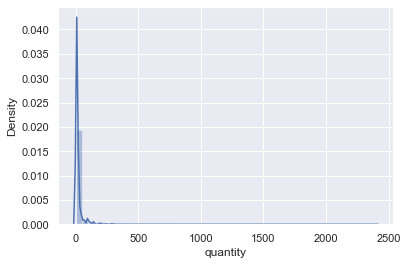

In [8]:
sns.distplot(data_no_neg['quantity'])

Tạo ra bảng dữ liệu mới mà loại bỏ 1% quantity, điều này có thể giúp loại bỏ các outliers ảnh hưởng đến data

In [9]:
q = data_no_neg['quantity'].quantile(0.99)
data_cleaned = data_no_neg[data_no_neg['quantity']<q]

/Users/thuha/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quantity', ylabel='Density'>

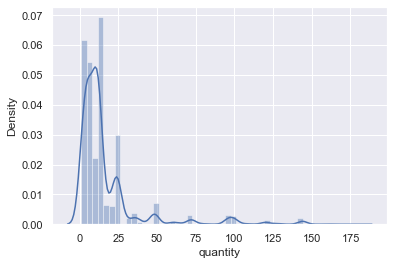

In [10]:
sns.distplot(data_cleaned['quantity'])

 Có thể sử dụng cách khác để loại bỏ bớt dữ liệu

In [11]:
data_3 = data_no_neg[data_no_neg['quantity']<200]

In [12]:
data_3.quantity.describe()

count    26320.000000
mean        16.880699
std         24.132026
min          1.000000
25%          6.000000
50%         12.000000
75%         16.000000
max        192.000000
Name: quantity, dtype: float64

/Users/thuha/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quantity', ylabel='Density'>

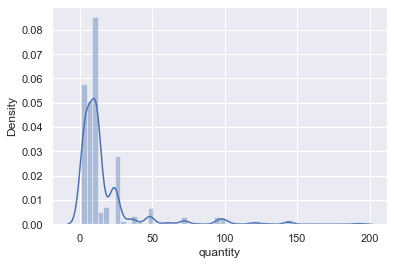

In [13]:
sns.distplot(data_3['quantity'])

In [14]:
type(data_3['tran_date'])

pandas.core.series.Series

Áp dụng RFM vào bài toán tìm nhóm khách hàng trung thành:
- Recency: Tính số ngày kể từ thời điểm khách hàng mua hàng đến thời điểm hiện tại ( trong bài toán này, chọn ngày hiện tại là 10/12/2011 do ngày mua hàng gần nhất là ngày 9/12/2011)
- Frequency: Tính toán số lượng orders của mỗi khách hàng 
- Monetary: tính tổng giá trị hàng khách hàng đã mua 

In [15]:
from datetime import datetime

In [16]:
data_cleaned['tran_date']=pd.to_datetime(data_cleaned['tran_date']).dt.date

/Users/thuha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
data_cleaned.head(5)

,tran_id,product_id,product_name,quantity,tran_date,unit_price,customer_id
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01,3.75,12583
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01,3.75,12583
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01,3.75,12583
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01,0.85,12583
4,536370,21883,STARS GIFT TAPE,24,2010-12-01,0.65,12583


In [18]:
print(data_cleaned.tran_date.min())
print(data_cleaned.tran_date.max())

2010-12-01
2011-12-09


In [19]:
from datetime import date
d0 = date(2011,12,10)

In [20]:
data_cleaned['recency'] = d0 - data_cleaned['tran_date']

/Users/thuha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data_cleaned['recency_nday']= data_cleaned.recency.apply(lambda x: x.days)

/Users/thuha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data_cleaned.head(5)

,tran_id,product_id,product_name,quantity,tran_date,unit_price,customer_id,recency,recency_nday
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01,3.75,12583,374 days,374
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01,3.75,12583,374 days,374
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01,3.75,12583,374 days,374
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01,0.85,12583,374 days,374
4,536370,21883,STARS GIFT TAPE,24,2010-12-01,0.65,12583,374 days,374


In [23]:
data_cleaned['monetary']=data_cleaned['quantity']* data_cleaned['unit_price']

/Users/thuha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Groupby theo customer_id,đếm số lần giao dịch và tổng số lượng sản phẩm khách hàng mua, tổng số tiền khách hàng đã chi tiêu cho các giao dịch. 

In [24]:
RFM_table = data_cleaned.groupby(['customer_id']).agg({'tran_id':'count','monetary':'sum','recency_nday':'mean'})

In [25]:
RFM_table.head(5)

,tran_id,monetary,recency_nday
customer_id,,,
12349,73,1757.55,19.000000
12356,59,2811.43,287.254237
12357,131,6207.67,34.000000
12361,10,189.90,288.000000
12362,266,5226.23,106.398496


In [26]:
RFM_table= RFM_table.rename(columns={'tran_id':'frequency','recency_nday':'recency'})

In [27]:
RFM_table.reset_index(drop=False, inplace=True)

In [28]:
RFM_table.head(5)

,customer_id,frequency,monetary,recency
0,12349,73,1757.55,19.000000
1,12356,59,2811.43,287.254237
2,12357,131,6207.67,34.000000
3,12361,10,189.90,288.000000
4,12362,266,5226.23,106.398496


Ta sẽ phân tách gía trị ở các cột RFM sử dụng quantiles, chỉ định điểm từ 1 đến 4, với: 1 thể hiện điểm số tốt nhất, 4 là điểm số thấp nhất. Điểm RFM cuối cùng được tính toán bằng tổng các điểm RFM riêng lẻ.

In [29]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [30]:
RFM_segmented = RFM_table.copy()

In [34]:
f_labels = range(1, 3)
m_labels = range(1, 3)
r_labels = range(2, 0, -1)

# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(RFM_table['frequency'], q=2, labels=f_labels)
r_groups = pd.qcut(RFM_table['recency'], q=2, labels=r_labels)
m_groups = pd.qcut(RFM_table['monetary'], q=2, labels=m_labels)

# Create new columns M, R and F
rfm = RFM_table.assign(R = r_groups, F = f_groups.values, M = m_groups.values)

In [35]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

0    6
1    5
2    6
3    3
4    6
Name: RFM_Score, dtype: int64


In [36]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] == 6:
        return 'Champions'
    elif df['RFM_Score'] == 5:
        return 'Loyal'
    else:
        return 'Potential'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
rfm.head()

,customer_id,frequency,monetary,recency,R,F,M,RFM_Score,RFM_Level
0,12349,73,1757.55,19.000000,2,2,2,6,Champions
1,12356,59,2811.43,287.254237,1,2,2,5,Loyal
2,12357,131,6207.67,34.000000,2,2,2,6,Champions
3,12361,10,189.90,288.000000,1,1,1,3,Potential
4,12362,266,5226.23,106.398496,2,2,2,6,Champions


In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
RFM_segmented['f_quartile']=RFM_segmented['frequency'].apply(FMScore, args=('frequency',quantiles))
RFM_segmented['m_quartile']=RFM_segmented['monetary'].apply(FMScore, args=('monetary',quantiles))
RFM_segmented['r_quartile']=RFM_segmented['recency'].apply(RScore, args=('recency',quantiles))

In [ ]:
RFM_segmented.head(5)

In [ ]:
RFM_segmented['rfm_score']=RFM_segmented.r_quartile.map(str)+RFM_segmented.f_quartile.map(str)+RFM_segmented.m_quartile.map(str)

In [ ]:
RFM_segmented.head(5)

In [ ]:
print('Best Customer: ',len(RFM_segmented[RFM_segmented['rfm_score']=='111']))
print('Loyal Customer: ',len(RFM_segmented[RFM_segmented['f_quartile']==1 ]) and len(RFM_segmented[RFM_segmented['r_quartile']==1 ]))
print('Spend Most: ', len(RFM_segmented[RFM_segmented['m_quartile']==1 ]))
print('Lost Customer: ', len(RFM_segmented[RFM_segmented['rfm_score']=='444']))

Tuỳ thuộc vào nhu cầu của phòng marketing để phân chia nhóm khách hàng nhỏ hơn. 
Có thể phân nhóm khách hàng theo tổng điểm, cột total_rfm_score

In [ ]:
RFM_segmented['total_rfm_score']= RFM_segmented[['f_quartile','m_quartile','r_quartile']].sum(axis=1)

In [ ]:
RFM_segmented.head(5)